# DATA SCIENCE LAB PROJECT
#Exploring Comprehensive Human Development: Beyond Economics and Education

## Matteo Altieri, Alessandro Natale Bianchi, Marta Brasola 905305

### Settembre 2023




In [ ]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns

In [ ]:
# colours
low_c = '#dd4124'
high_c = '#009473'
plt.rcParams["font.family"] = "monospace"
blue_palette = sns.color_palette("Blues", as_cmap=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/preprocessed_data.csv")
country_info = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/country_info.csv")

In [ ]:
df_2021 = df[df['edition'] == 2021].reset_index(drop=True)

In [ ]:
map_categories = {
    'hdi': 'human_development_index',
    'le': 'life_expectancy_at_birth',
    'eys': 'expected_years_of_schooling',
    'mys': 'mean_years_of_schooling',
    'gnipc': 'gross_national_income_pc',
    'ihdi': 'inequality_adjusted_hdi' ,
    'coef_ineq': 'coefficient_of_human_inequality',
    'loss': 'loss',
    'ineq_le': 'inequality_life_expectancy',
    'ineq_edu': 'inequality_eduation',
    'ineq_inc': 'inequality_income',
    'phdi': 'Planetary_pressures_hdi',
    'co2_prod': 'carbon_dioxide_emissions_pc',
    'mf': 'material_footprint_pc',
    'gdi': 'gender_development_index',
    'hdi_f': 'hdi_female',
    'le_f': 'life_expectancy_at_birth_female',
    'eys_f': 'expected_years_of_schooling_female',
    'mys_f': 'mean_years_of_schooling_female',
    'gni_pc_f': 'gross_national_income_pc_female',
    'hdi_m': 'hdi_male',
    'le_m': 'life_expectancy_at_birth_male',
    'eys_m': 'expected_years_of_schooling_male',
    'mys_m': 'mean_years_of_schooling_male',
    'gni_pc_m': 'gross_national_income_pc_male',
    'gii': 'gender_inequality_index',
    'mmr': 'maternal_mortality_ratio',
    'abr': 'adolescent_birth_rate',
    'se_f': 'at_least_secondary_educ_female',
    'se_m': 'at_least_secondary_educ_male',
    'pr_f': 'share_seats_in_parliament_female',
    'pr_m': 'share_seats_in_parliament_male',
    'lfpr_f': 'labour_force_partecipation_female',
    'lfpr_m': 'labour_force_partecipation_male',

}

## HDI Score through the years

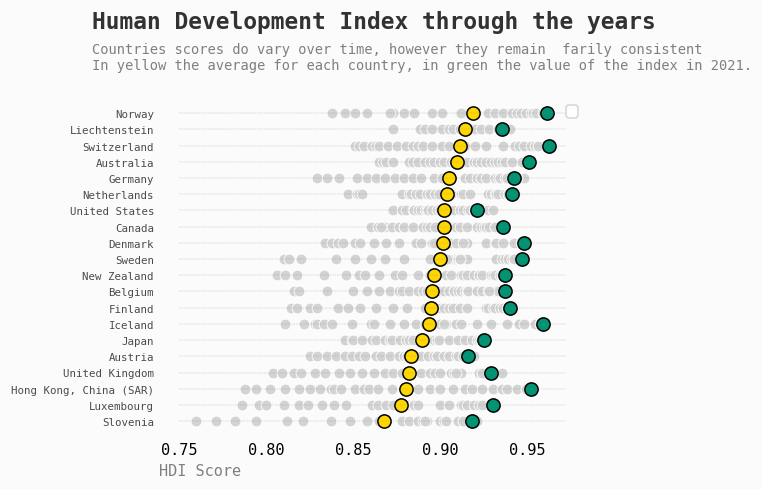

In [ ]:
background = "#fbfbfb"
fig, ax = plt.subplots(1,1, figsize=(5, 4),dpi=110)
fig.patch.set_facecolor(background) # figure background color
ax.set_facecolor(background)

# Reduced list as too many to show all at once
top_list_ = df.groupby('country')['hdi'].mean().sort_values(ascending=False).reset_index()[:20].sort_values(by='hdi',ascending=True)


plot = 1
for country in top_list_['country']:
    mean = df[df['country'] == country].groupby('country')['hdi'].mean()
    # historic scores
    sns.scatterplot(data=df[df['country'] == country], y=plot, x='hdi',color='lightgrey',s=50, ax=ax)
    # mean score
    sns.scatterplot(data=df[df['country'] == country], y=plot, x=mean, color='gold',ec='black',linewidth=1,s=75,ax=ax)
    #2021 score
    sns.scatterplot(data=df[(df['country'] == country) & (df['edition']==2021)], y=plot, x='hdi', color= high_c, ec='black',linewidth=1,s=75,ax=ax)
    plot += 1


ax.set_yticks(top_list_.index+1)
ax.set_yticklabels(top_list_['country'][::-1], fontdict={'horizontalalignment': 'right'}, alpha=0.7, fontsize=7)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("HDI Score",fontfamily='monospace',loc='left',color='gray')


for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.hlines(y=top_list_.index+1, xmin=Xstart, xmax=Xend, color='gray', alpha=0.5, linewidth=.3, linestyles='--')
ax.set_axisbelow(True)
ax.text(0.7, Yend+4.3, 'Human Development Index through the years', fontsize=15, fontweight='bold',color='#323232')
ax.text(0.7, Yend+0.75,
'''
Countries scores do vary over time, however they remain  farily consistent
In yellow the average for each country, in green the value of the index in 2021.
''', fontsize=9, fontweight='light', fontfamily='monospace',color='gray')

plt.annotate('2021\nscore', xy=(1, 19), xytext=(1, 11),
             arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"), fontsize=10,fontfamily='monospace',ha='center', color=high_c)

plt.annotate('Mean\nscore', xy=(1, 20), xytext=(1, 16),
             arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.5"), fontsize=10,fontfamily='monospace',ha='center', color='gold')


#plt.savefig('tt.png')
plt.show()

In [ ]:
subset = df[df['edition']==2021][['hdi','country']].reset_index(drop=True)
worst_10 = subset.sort_values(by='hdi', ascending=True)[0:10].reset_index(drop=True)
top_10 = subset.sort_values(by='hdi', ascending=False)[0:10].reset_index(drop=True).sort_values(by='hdi', ascending=True)
top_worst = pd.concat([worst_10, top_10], ignore_index=True).sort_values(by='hdi',ascending=True)

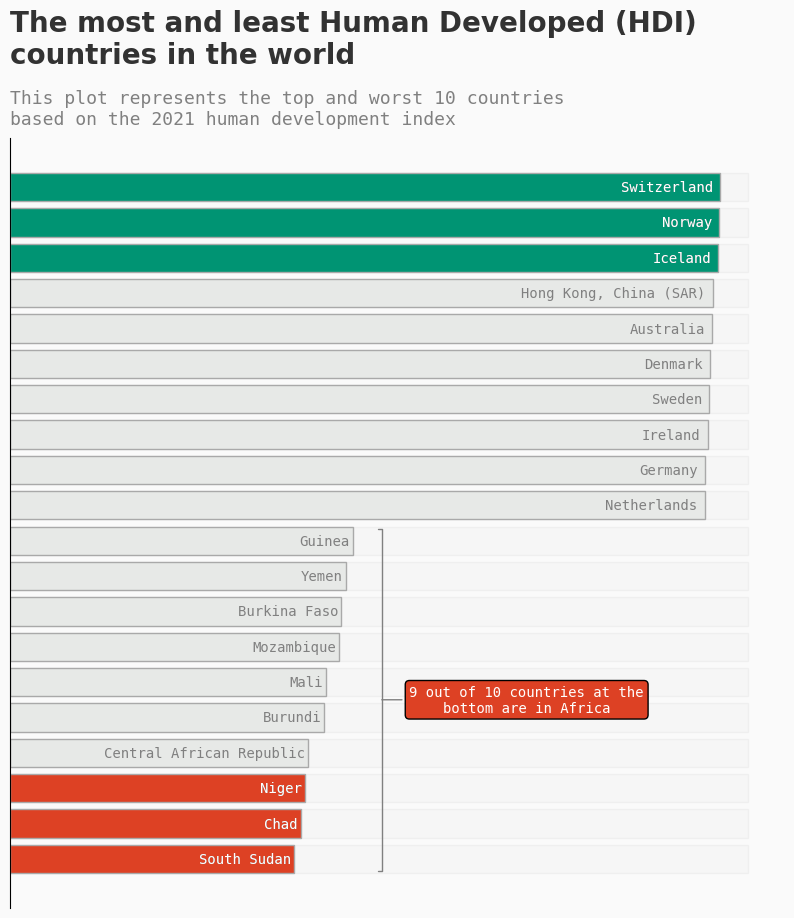

In [ ]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.05, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])

background_color = "#fafafa"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)


# Plots
# Happiest
data = top_worst

color_map = ['#e7e9e7' for _ in range(20)]
color_map[0] = color_map[1] = color_map[2] =  low_c # color highlight
color_map[17] = color_map[18] = color_map[19] =  high_c

# base
ax0.barh(data.index, 1, edgecolor='darkgray',color='lightgray',alpha=0.1)
# actual
ax0.barh(data.index, data['hdi'], edgecolor='darkgray', color=color_map)


for i in range(0,20):
    ax0.annotate(list(data.country)[i],
                   xy=(data['hdi'][i]-(data['hdi'][i]*0.01), i),
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=10, color='gray',rotation=0)
# diff color text
for i in range(0,3):
    ax0.annotate(list(data.country)[i],
                   xy=(data['hdi'][i]-(data['hdi'][i]*0.01), i),
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=10, color='white',rotation=0)


for i in range(17,20):
    ax0.annotate(list(data.country)[i],
                   xy=(data['hdi'][i]-(data['hdi'][i]*0.01), i),
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=10, color='white',rotation=0)


ax0.axes.get_xaxis().set_ticks([])
ax0.axes.get_yaxis().set_ticks([])



for s in ['top', 'bottom', 'right']:
    ax0.spines[s].set_visible(False)

ax0.text(0,22.5,'''The most and least Human Developed (HDI)
countries in the world''',fontfamily='sans-serif',fontsize=20,fontweight='bold',color='#323232')


ax0.text(0,20.8,'''This plot represents the top and worst 10 countries
based on the 2021 human development index''',fontfamily='monospace',fontsize=13,fontweight='light',color='gray')

ax0.annotate('9 out of 10 countries at the\nbottom are in Africa', xy=(0.5, 4.5), xytext=(0.7, 4.5), xycoords='data',
            fontsize=10, ha='center', va='center',fontfamily='monospace',
            bbox=dict(boxstyle='round', fc=low_c),
            arrowprops=dict(arrowstyle='-[, widthB=12.3, lengthB=0.3', lw=1, color='gray'), color='white')
plt.savefig('foo.png')
plt.show()

# Correlation 1 - HDI


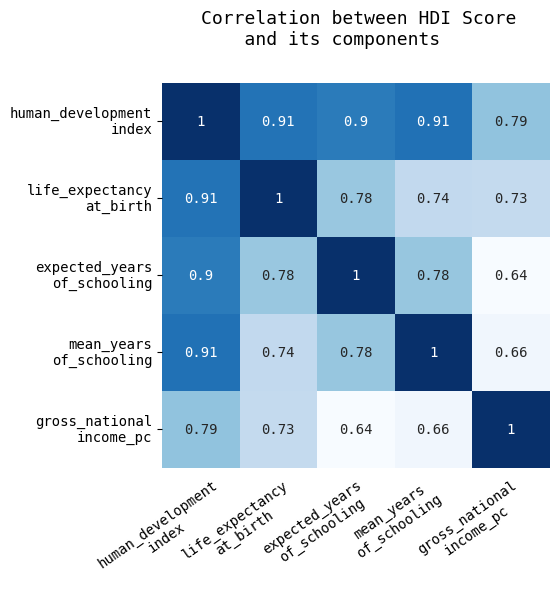

In [ ]:
sub = df_2021[['hdi','le','eys', 'mys', 'gnipc']].rename(columns=map_categories)
labels = ["human_development\nindex",'life_expectancy\nat_birth','expected_years\nof_schooling','mean_years\nof_schooling', 'gross_national\nincome_pc']


corr = sub.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, cbar=False, cmap=blue_palette)
Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart+0.5, Yend-0.5,

'''Correlation between HDI Score
    and its components''', fontsize=13)

x_tick_positions = [0, 1, 2, 3, 4]  # Adjust the positions as needed
ax.set_xticks(x_tick_positions)

ax.set_xticklabels(labels, rotation=35, ha='center')
ax.set_yticklabels(labels, rotation=0)

#ax.set_xticks([])
ax.xaxis.set_ticks_position('none')
for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)
#plt.savefig("new_heatmap.png")
#plt.tight_layout()
plt.show()

In [ ]:
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

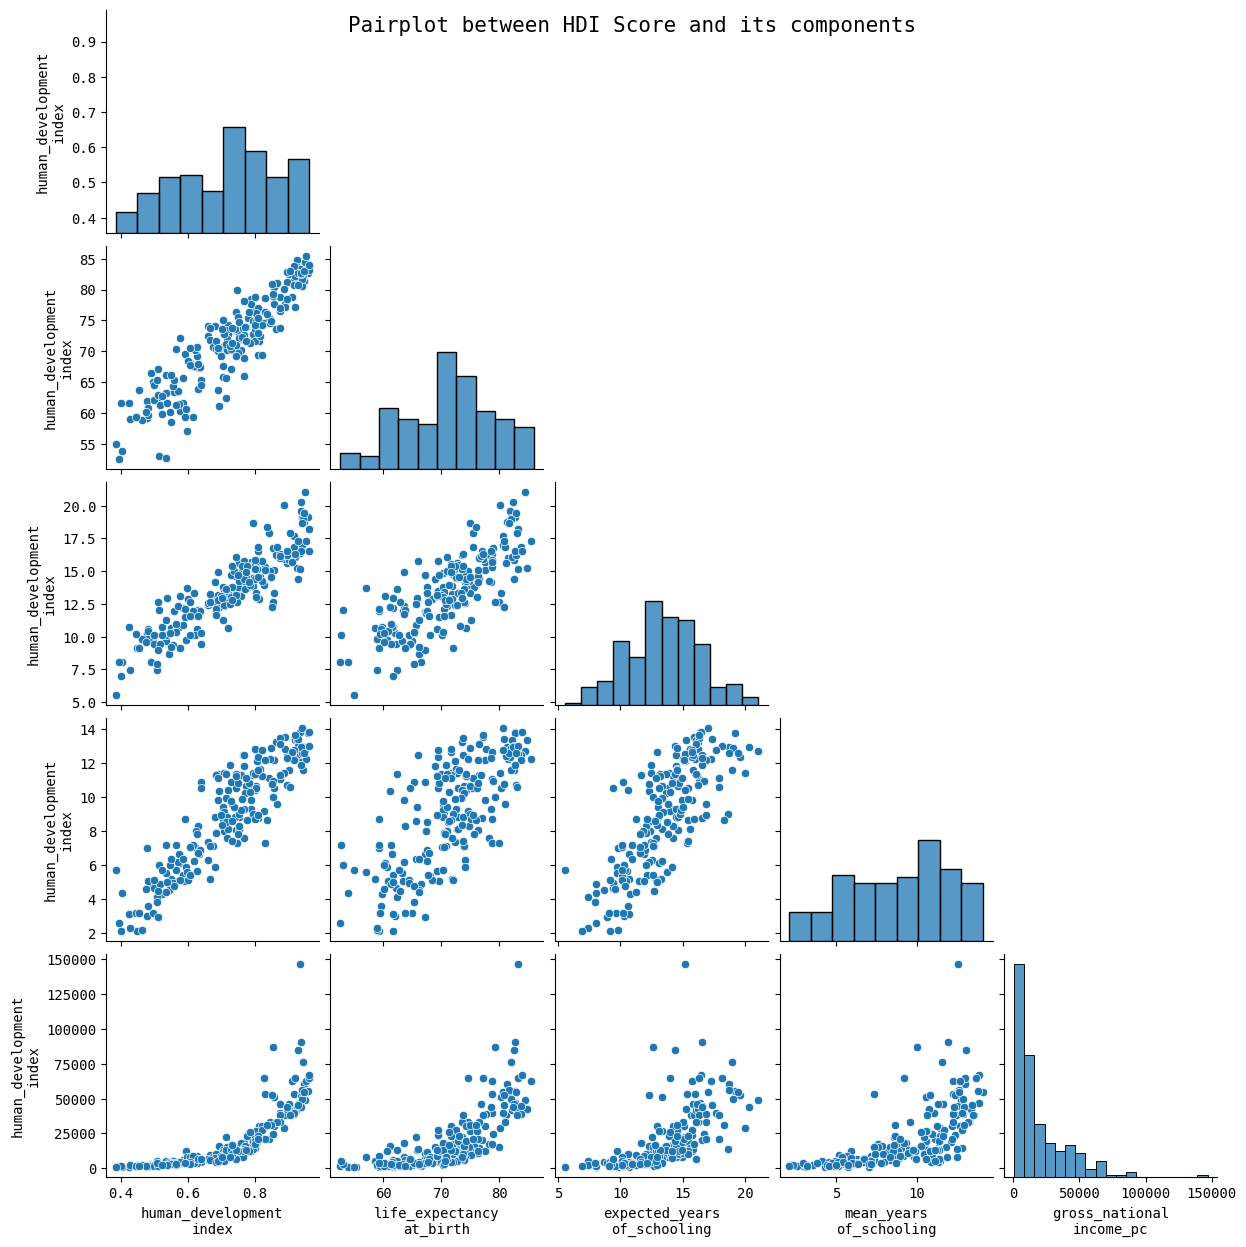

In [ ]:

# Create the pairplot
pp = sns.pairplot(sub, corner=False)
pp.map_upper(hide_current_axis)
# Set custom y-axis label positions for the pairplot
for i, ax in enumerate(pp.axes.flat):
    ax.set_xlabel(labels[i % len(labels)],rotation=0)
    ax.set_ylabel(labels[i % len(labels)])  # Set y-axis label


pp.fig.suptitle("Pairplot between HDI Score and its components", fontsize=15)

plt.show()

# Correlation 2 - GDI

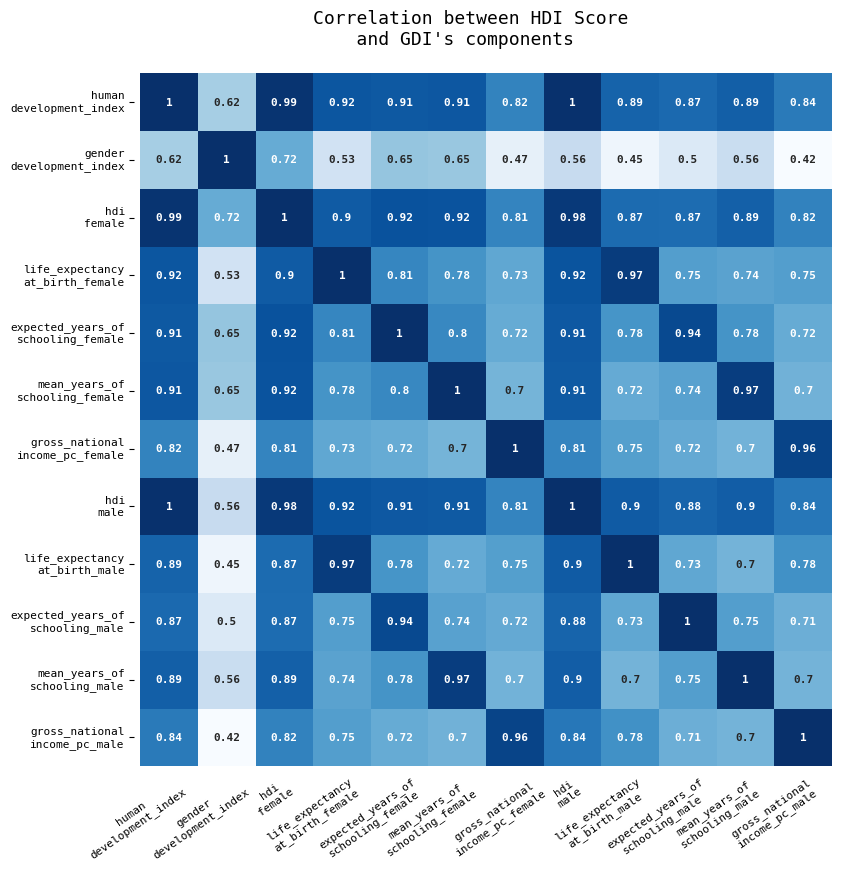

In [ ]:
sub = df_2021[['hdi', 'gdi', 'hdi_f', 'le_f', 'eys_f', 'mys_f', 'gni_pc_f',
               'hdi_m', 'le_m', 'eys_m', 'mys_m', 'gni_pc_m']].rename(columns=map_categories)
labels = ['human\ndevelopment_index','gender\ndevelopment_index', 'hdi\nfemale', 'life_expectancy\nat_birth_female', 'expected_years_of\nschooling_female',
         'mean_years_of\nschooling_female', 'gross_national\nincome_pc_female', 'hdi\nmale', 'life_expectancy\nat_birth_male',
         'expected_years_of\nschooling_male', 'mean_years_of\nschooling_male', 'gross_national\nincome_pc_male']

corr = sub.corr()
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corr, annot=True, cbar=False, cmap=blue_palette, annot_kws={"fontsize":8, "weight": "bold"})
Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart+3, Yend-0.5,

'''Correlation between HDI Score
    and GDI's components''', fontsize=13)

x_tick_positions = [-0.1, 1, 2.3, 3, 4,5,6.2,7.4,8,9,10, 11]  # Adjust the positions as needed
ax.set_xticks(x_tick_positions)

ax.set_xticklabels(labels, rotation=35, ha='center', fontsize=8 )
ax.set_yticklabels(labels, rotation=0, fontsize=8)

#ax.set_xticks([])
ax.xaxis.set_ticks_position('none')
for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)
#plt.savefig("new_heatmap.png")
#plt.tight_layout()
plt.show()

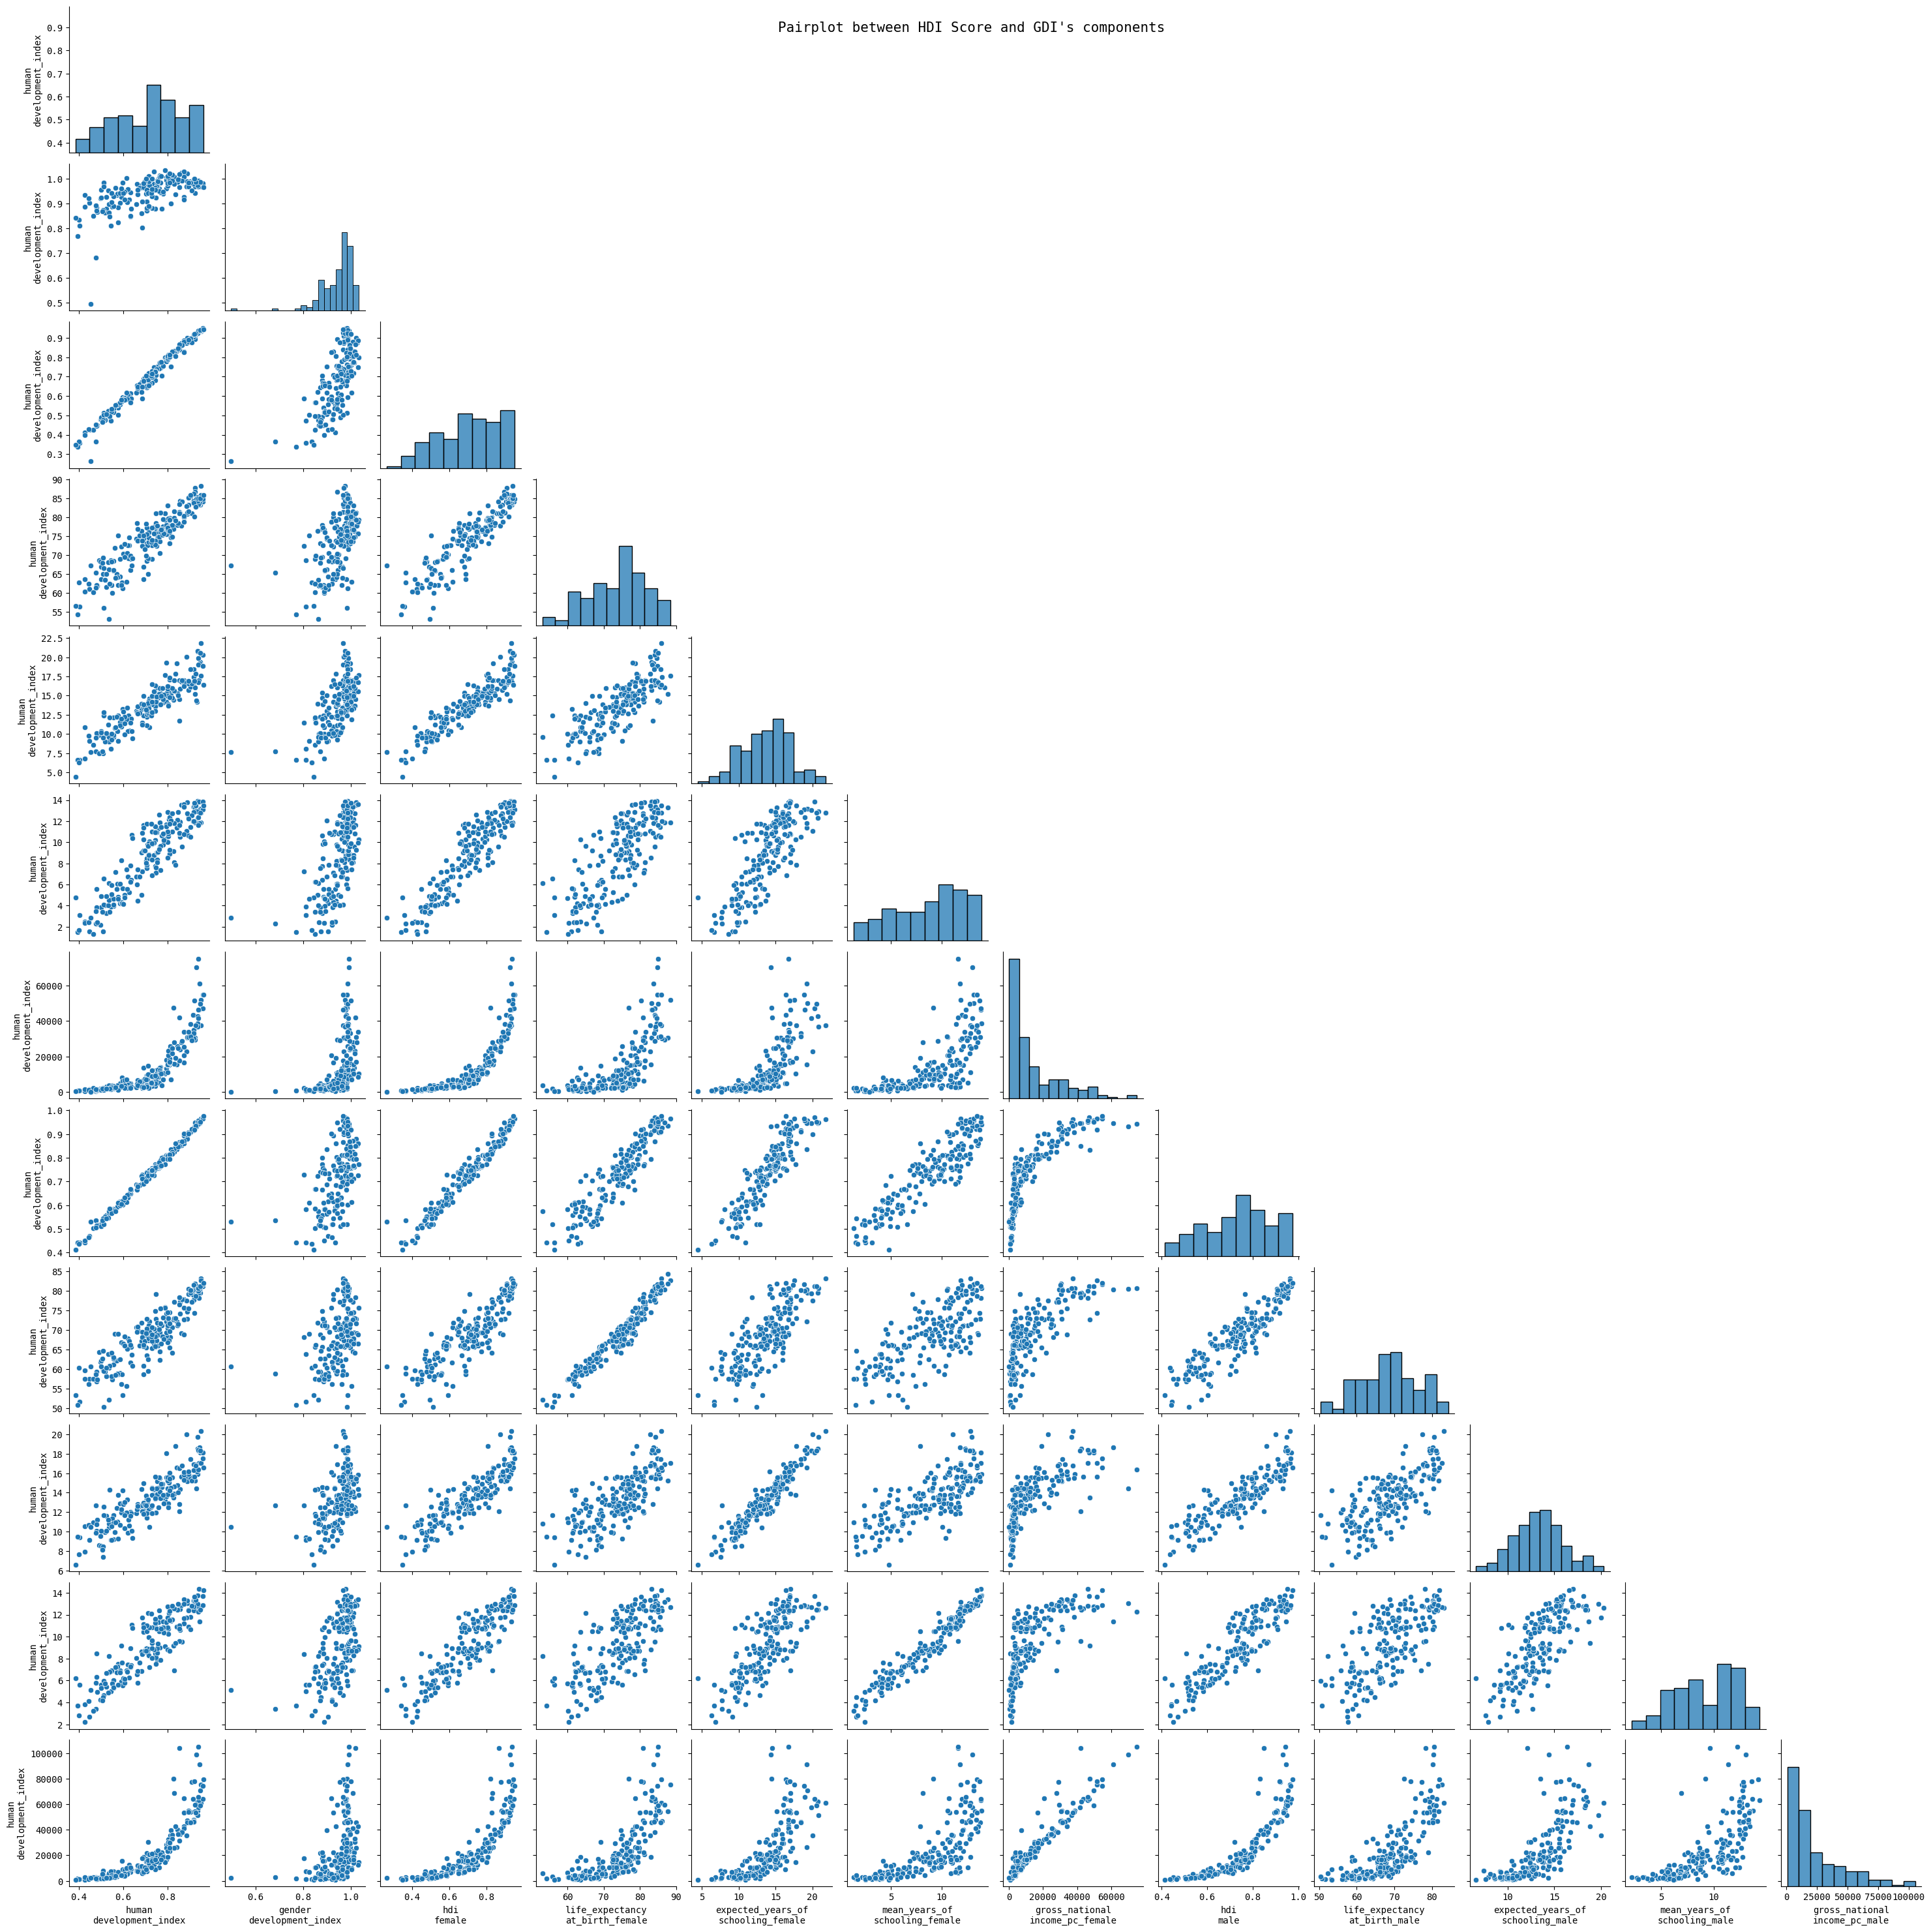

In [ ]:

# Create the pairplot
pp = sns.pairplot(sub, corner=False)
pp.map_upper(hide_current_axis)
# Set custom y-axis label positions for the pairplot
for i, ax in enumerate(pp.axes.flat):
    ax.set_xlabel(labels[i % len(labels)],rotation=0)
    ax.set_ylabel(labels[i % len(labels)])  # Set y-axis label


pp.fig.suptitle("Pairplot between HDI Score and GDI's components", fontsize=15)

plt.show()

# Correlation 3 - IHDI

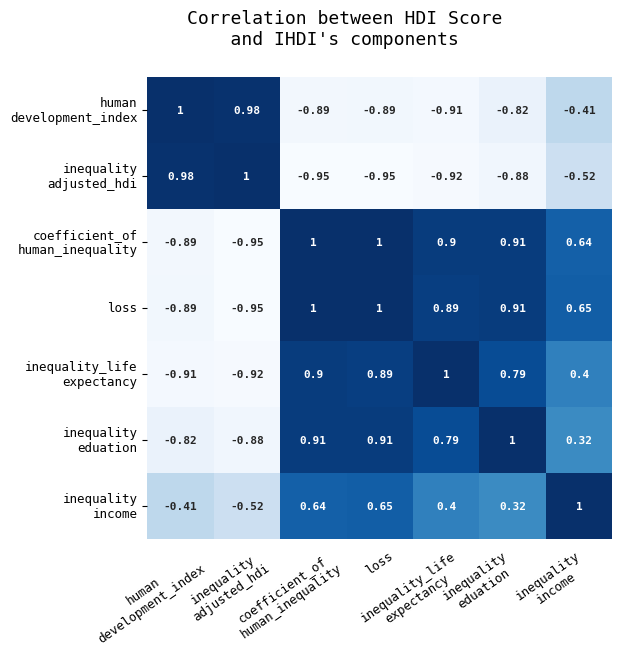

In [ ]:
sub = df_2021[['hdi','ihdi','coef_ineq', 'loss', 'ineq_le','ineq_edu','ineq_inc']].rename(columns=map_categories)
labels = [
    'human\ndevelopment_index',
    'inequality\nadjusted_hdi' ,
    'coefficient_of\nhuman_inequality',
    'loss',
    'inequality_life\nexpectancy',
    'inequality\neduation',
    'inequality\nincome']


corr = sub.corr()
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(corr, annot=True, cbar=False, cmap=blue_palette, annot_kws={"fontsize":8, "weight": "bold"})
Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart+0.6, Yend-0.5,

'''Correlation between HDI Score
    and IHDI's components''', fontsize=13)

x_tick_positions = [0, 1.2, 2.1, 3.5, 4, 5, 6.1]  # Adjust the positions as needed
ax.set_xticks(x_tick_positions)

ax.set_xticklabels(labels, rotation=35, ha='center', fontsize=9)
ax.set_yticklabels(labels, rotation=0, fontsize=9)

#ax.set_xticks([])
ax.xaxis.set_ticks_position('none')
for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)
#plt.savefig("new_heatmap.png")
plt.show()

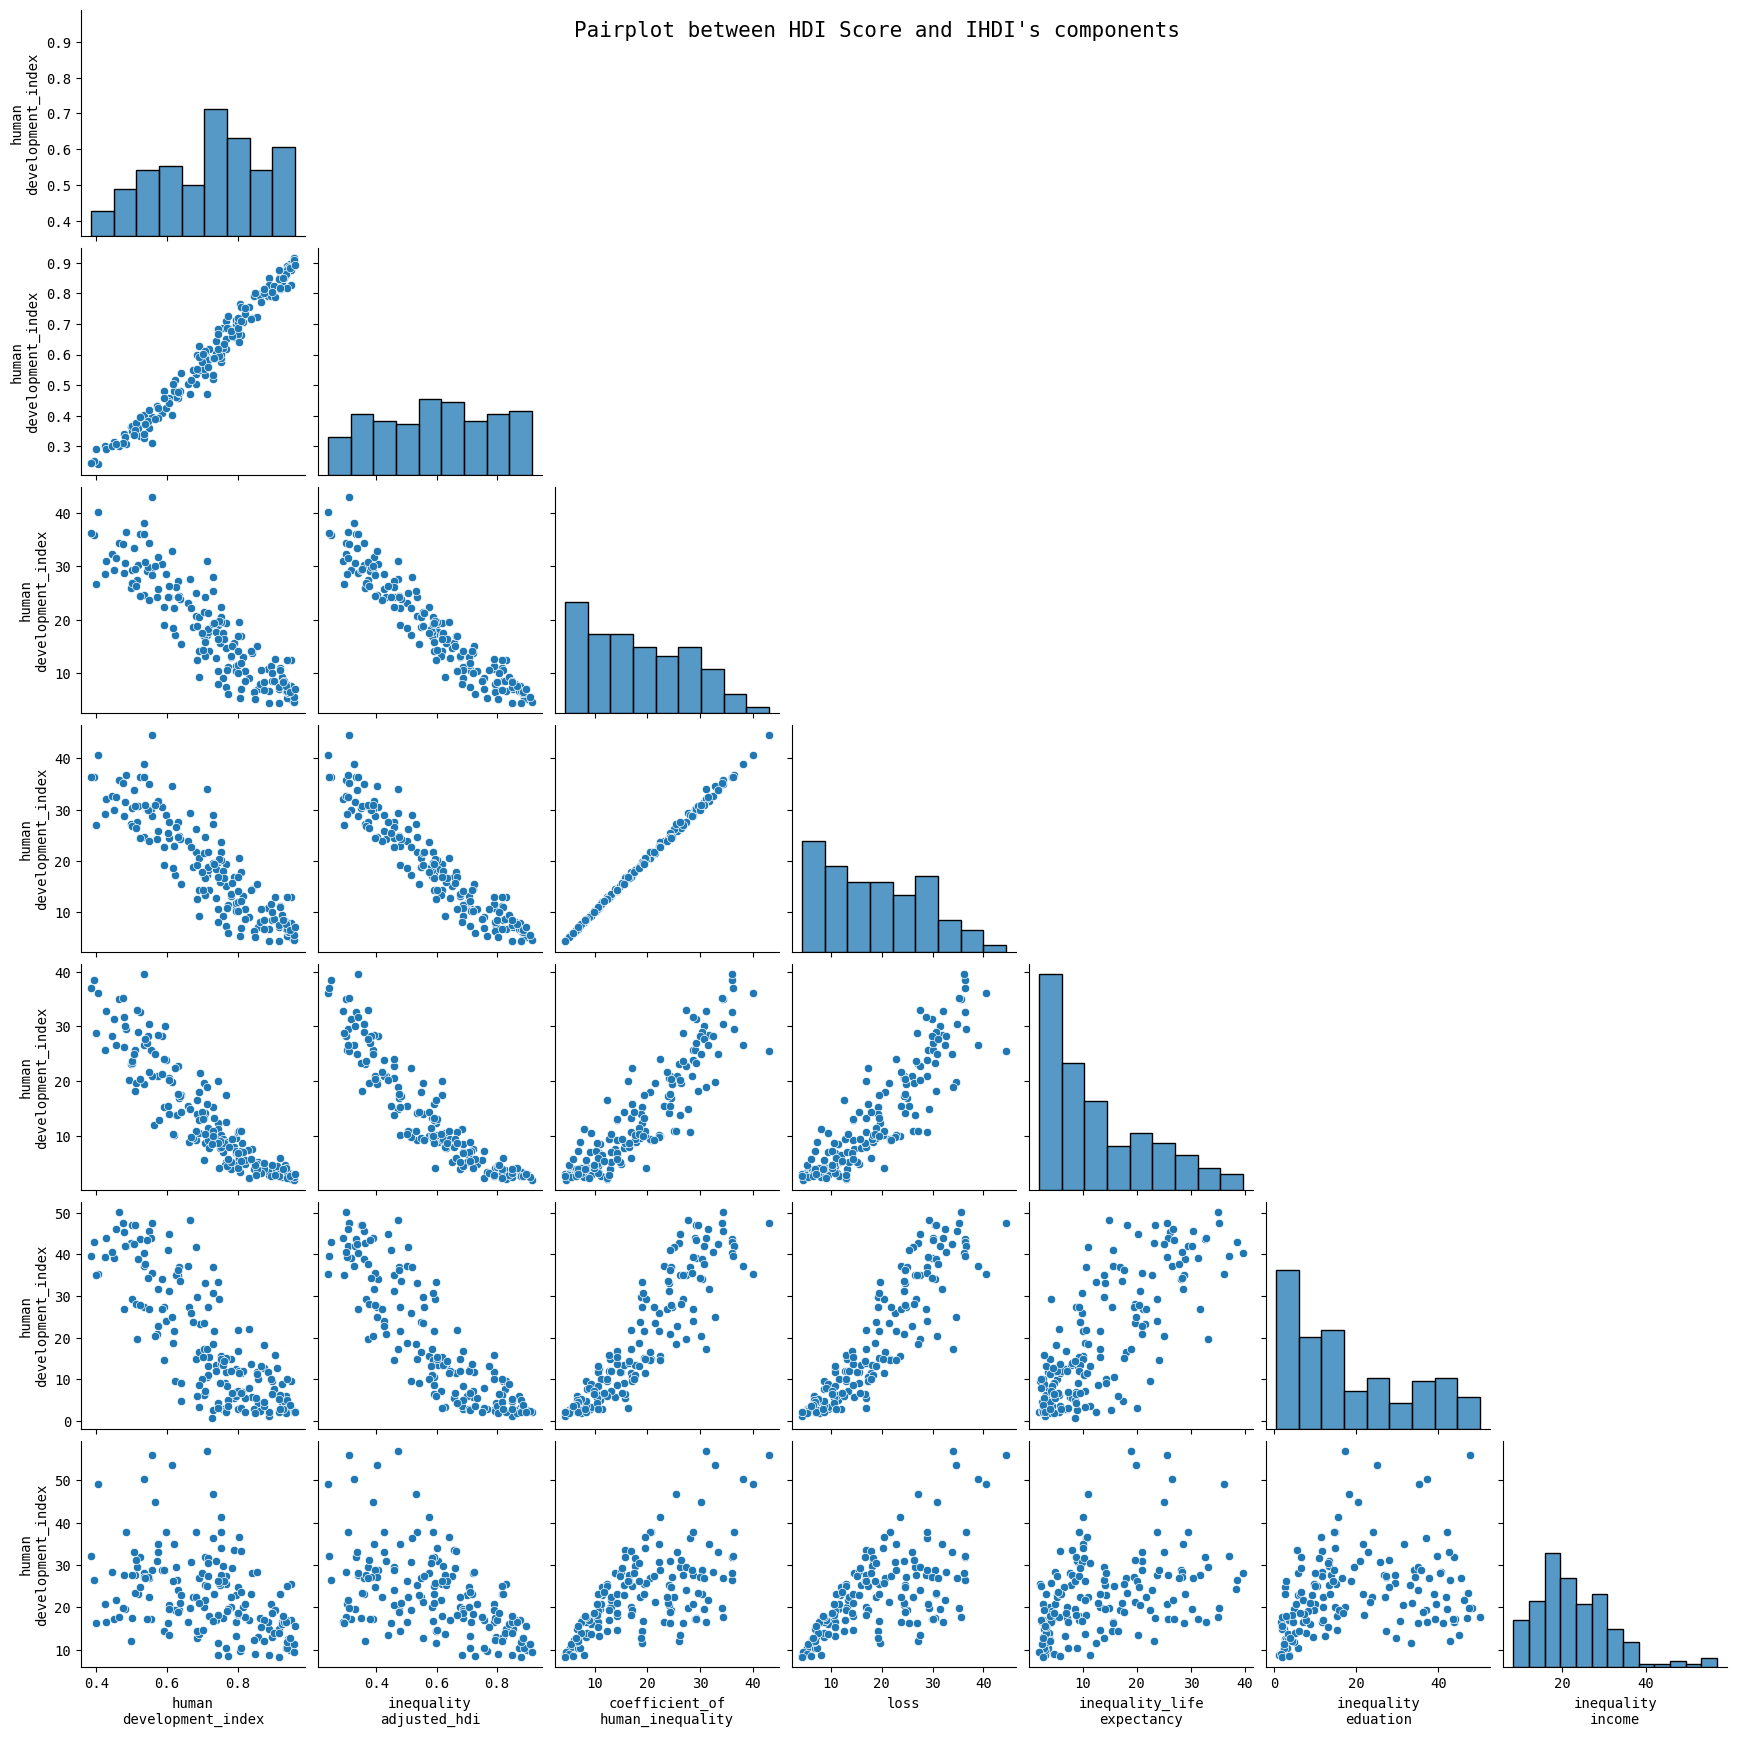

In [ ]:
# Create the pairplot
pp = sns.pairplot(sub, corner=False)
pp.map_upper(hide_current_axis)
# Set custom y-axis label positions for the pairplot
for i, ax in enumerate(pp.axes.flat):
    ax.set_xlabel(labels[i % len(labels)],rotation=0)
    ax.set_ylabel(labels[i % len(labels)])  # Set y-axis label


pp.fig.suptitle("Pairplot between HDI Score and IHDI's components", fontsize=15)

plt.show()

# Correlation 4 -  GII

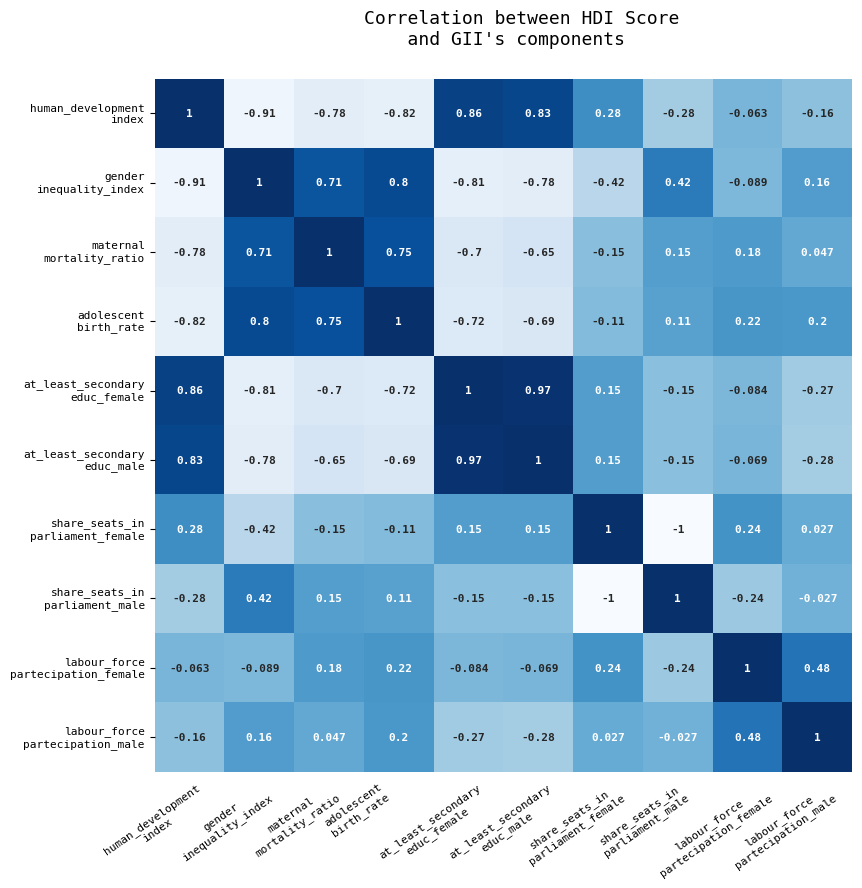

In [ ]:
sub = df_2021[['hdi','gii', 'mmr', 'abr', 'se_f', 'se_m', 'pr_f', 'pr_m', 'lfpr_f', 'lfpr_m']].rename(columns=map_categories)
labels = ['human_development\nindex','gender\ninequality_index', 'maternal\nmortality_ratio', 'adolescent\nbirth_rate', 'at_least_secondary\neduc_female',
          'at_least_secondary\neduc_male', 'share_seats_in\nparliament_female', 'share_seats_in\nparliament_male',
          'labour_force\npartecipation_female', 'labour_force\npartecipation_male']

corr = sub.corr()
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corr, annot=True, cbar=False, cmap=blue_palette, annot_kws={"fontsize":8, "weight": "bold"})
Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart+3, Yend-0.5,

'''Correlation between HDI Score
    and GII's components''', fontsize=13)

x_tick_positions = [0, 1, 2, 2.9, 4,5,6,7,8,9]  # Adjust the positions as needed
ax.set_xticks(x_tick_positions)

ax.set_xticklabels(labels, rotation=35, ha='center', fontsize=8)
ax.set_yticklabels(labels, rotation=0, fontsize=8)

#ax.set_xticks([])
ax.xaxis.set_ticks_position('none')
for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)
#plt.savefig("new_heatmap.png")
#plt.tight_layout()
plt.show()

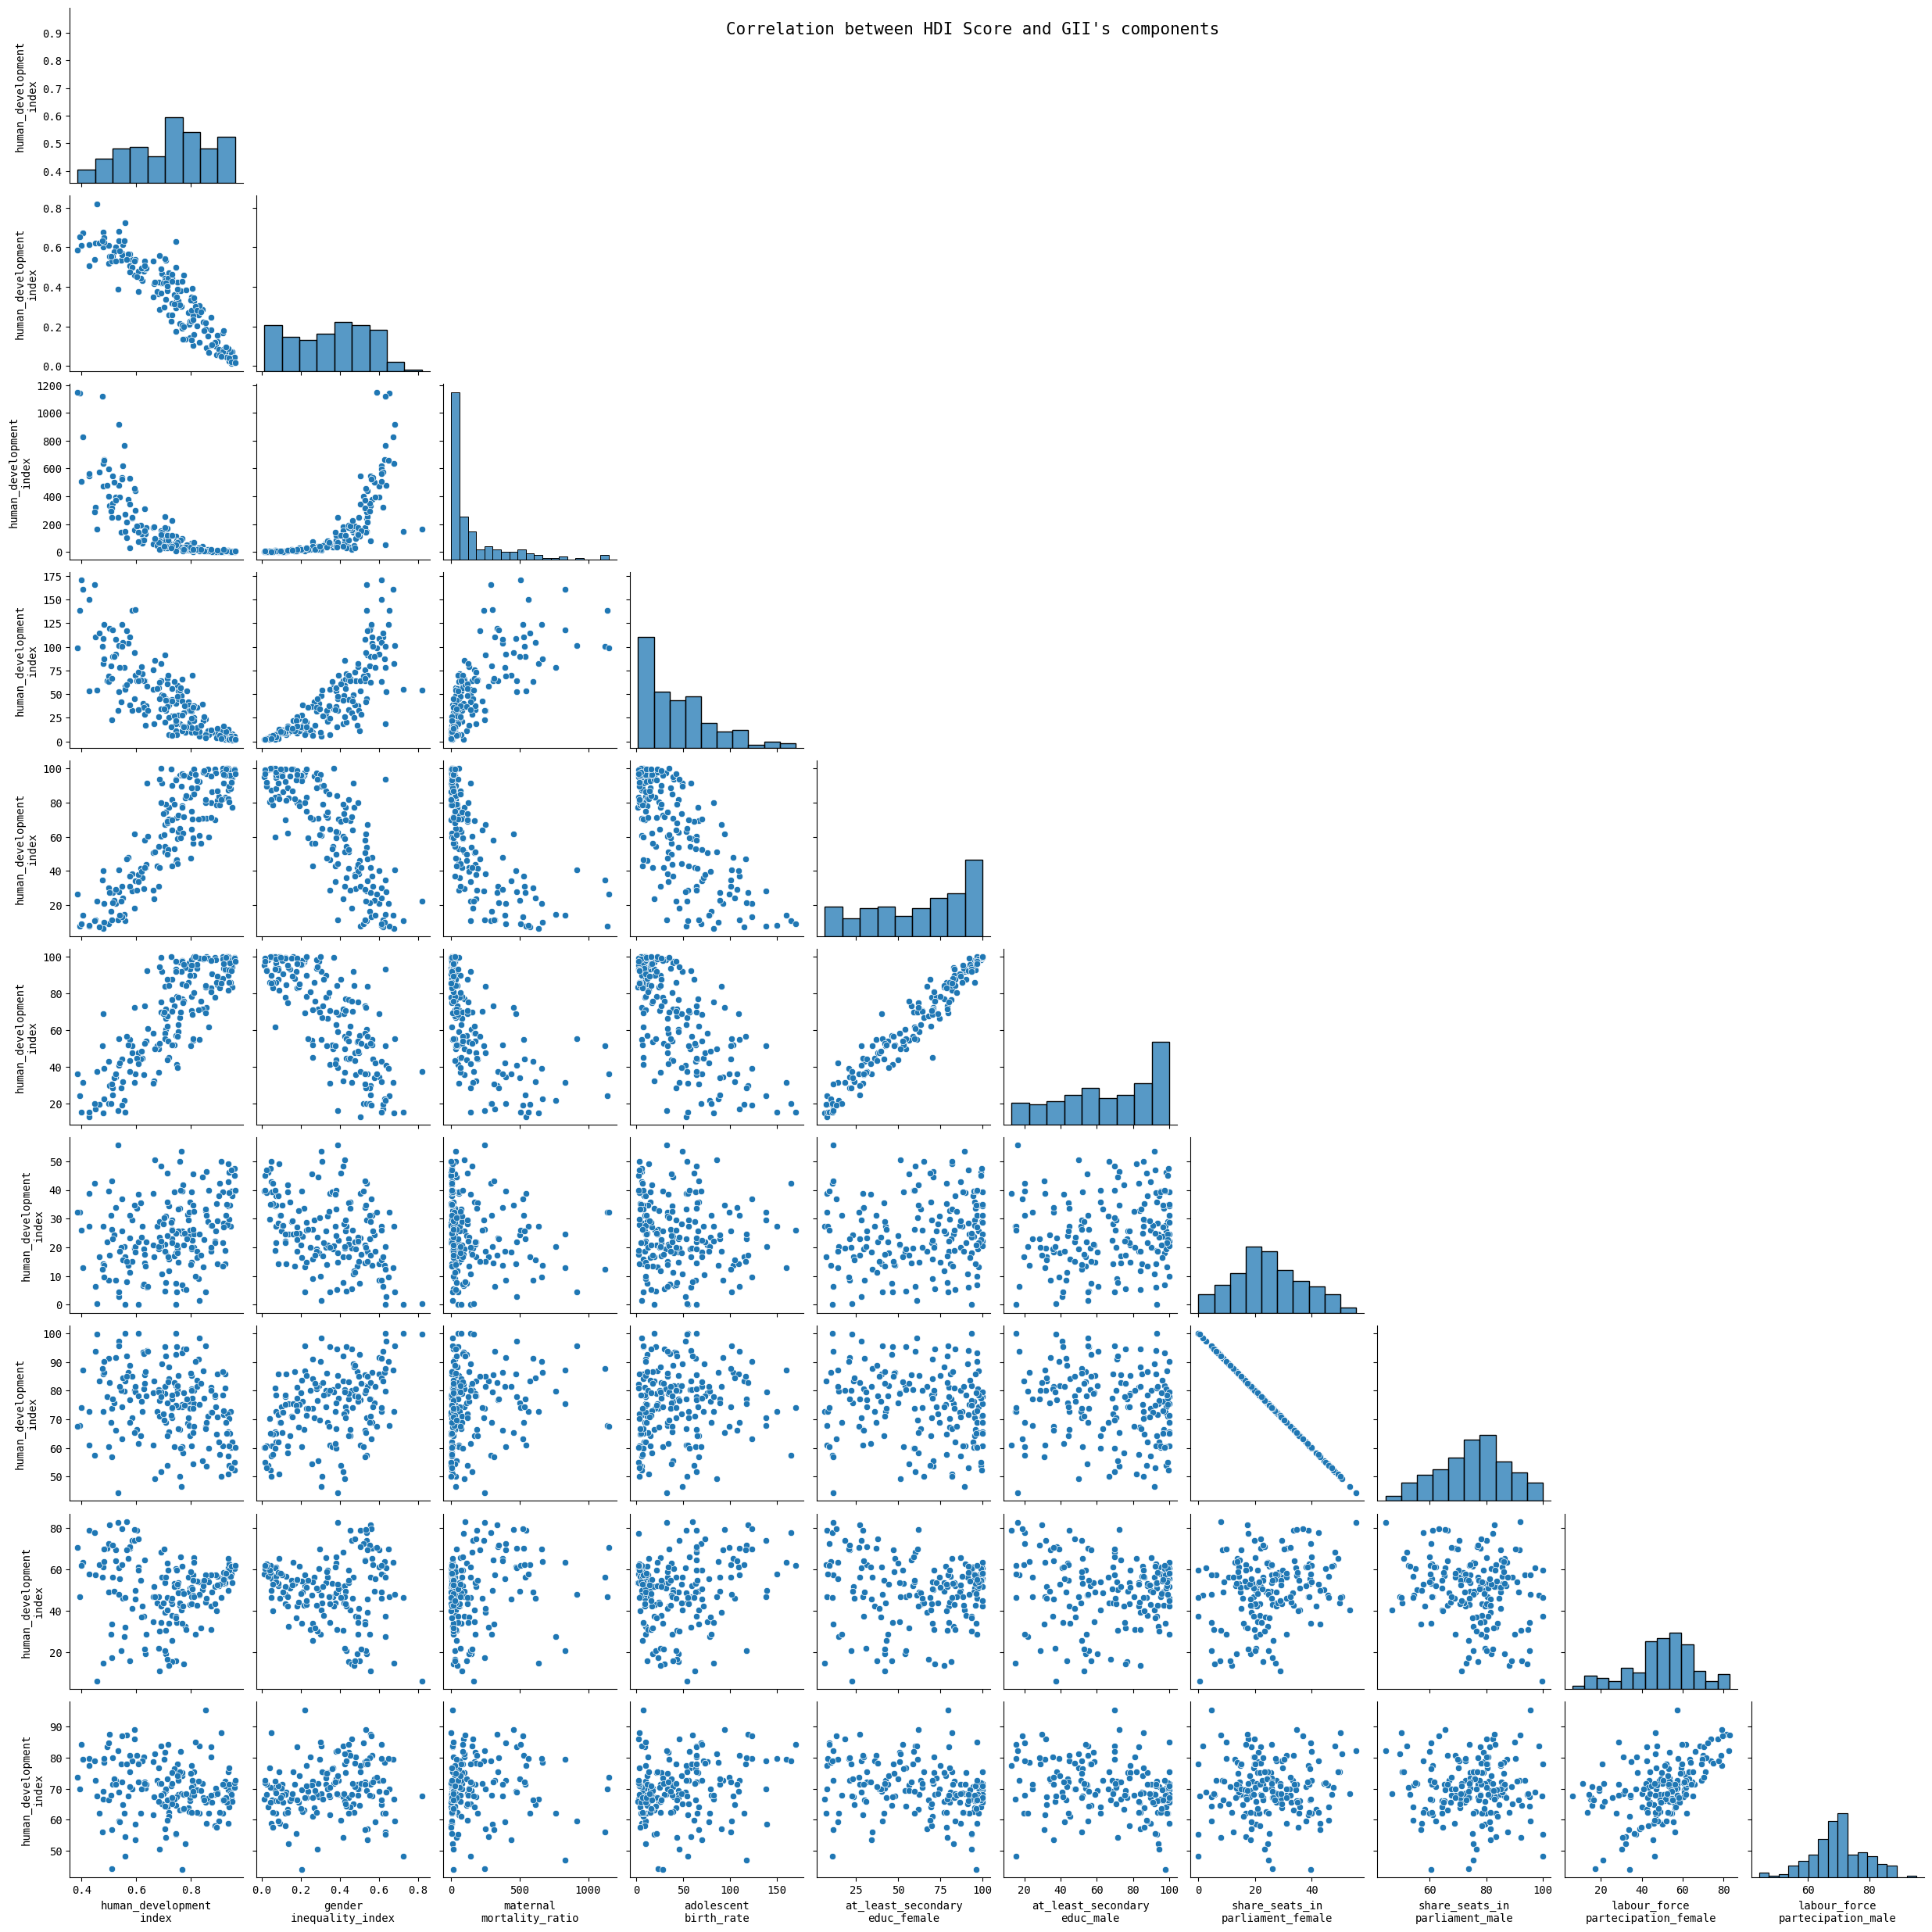

In [ ]:
# Create the pairplot
pp = sns.pairplot(sub, corner=False)
pp.map_upper(hide_current_axis)
# Set custom y-axis label positions for the pairplot
for i, ax in enumerate(pp.axes.flat):
    ax.set_xlabel(labels[i % len(labels)],rotation=0)
    ax.set_ylabel(labels[i % len(labels)])  # Set y-axis label


pp.fig.suptitle("Correlation between HDI Score and GII's components", fontsize=15)

plt.show()

# Correlation 5 - PHDI

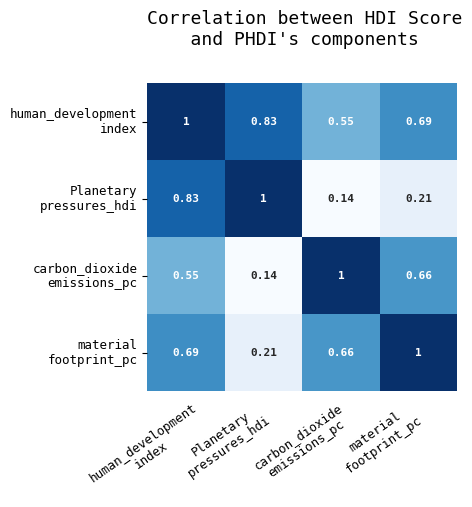

In [ ]:
sub = df_2021[['hdi','phdi','co2_prod','mf']].rename(columns=map_categories)

labels = ['human_development\nindex','Planetary\npressures_hdi','carbon_dioxide\nemissions_pc','material\nfootprint_pc']


corr = sub.corr()
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(corr, annot=True, cbar=False, cmap=blue_palette, annot_kws={"fontsize":8, "weight": "bold"})
Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart, Yend-0.5,

'''Correlation between HDI Score
    and PHDI's components''', fontsize=13)

x_tick_positions = [0, 1, 2,3]  # Adjust the positions as needed
ax.set_xticks(x_tick_positions)

ax.set_xticklabels(labels, rotation=35, ha='center', fontsize=9)
ax.set_yticklabels(labels, rotation=0, fontsize=9)

#ax.set_xticks([])
ax.xaxis.set_ticks_position('none')
for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)
#plt.savefig("new_heatmap.png")
plt.show()

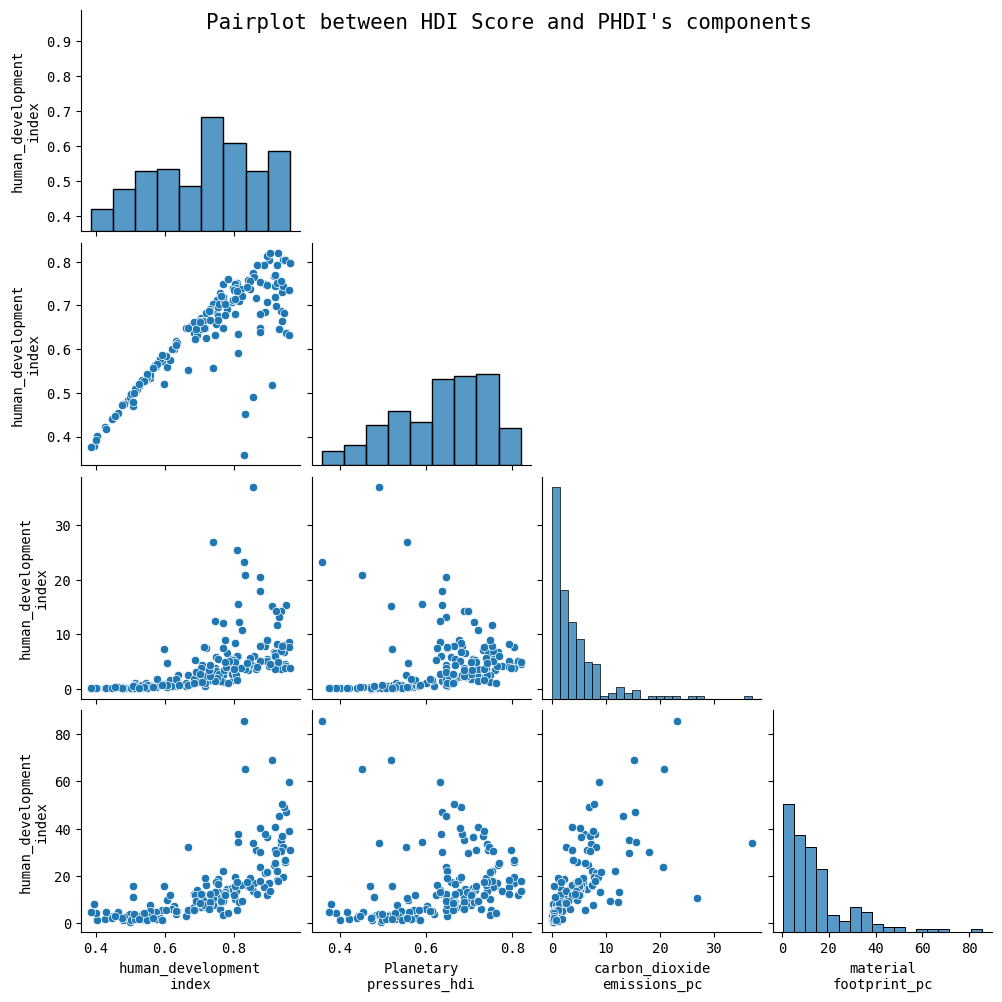

In [ ]:
# Create the pairplot
pp = sns.pairplot(sub, corner=False)
pp.map_upper(hide_current_axis)
# Set custom y-axis label positions for the pairplot
for i, ax in enumerate(pp.axes.flat):
    ax.set_xlabel(labels[i % len(labels)],rotation=0)
    ax.set_ylabel(labels[i % len(labels)])  # Set y-axis label


pp.fig.suptitle("Pairplot between HDI Score and PHDI's components", fontsize=15)

plt.show()

# Correlation 6 - Indici migliori

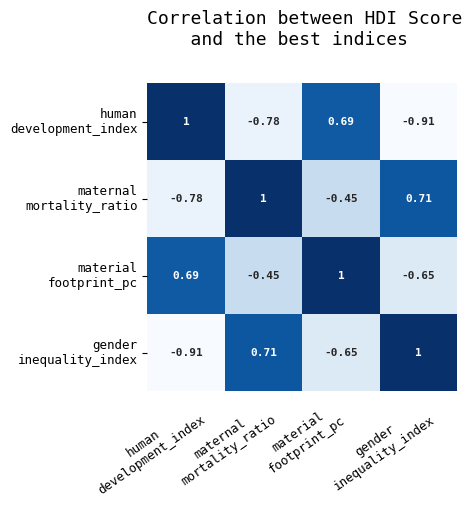

In [ ]:
sub = df_2021[['hdi','mmr','mf', 'gii']].rename(columns=map_categories)

labels = ['human\ndevelopment_index','maternal\nmortality_ratio','material\nfootprint_pc', 'gender\ninequality_index']


corr = sub.corr()
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(corr, annot=True, cbar=False, cmap=blue_palette, annot_kws={"fontsize":8, "weight": "bold"})
Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart, Yend-0.5,

'''Correlation between HDI Score
    and the best indices''', fontsize=13)

x_tick_positions = [0, 1,2,3]  # Adjust the positions as needed
ax.set_xticks(x_tick_positions)

ax.set_xticklabels(labels, rotation=35, ha='center', fontsize=9)
ax.set_yticklabels(labels, rotation=0, fontsize=9)

#ax.set_xticks([])
ax.xaxis.set_ticks_position('none')
for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)
plt.savefig("new_heatmap.png")
plt.show()

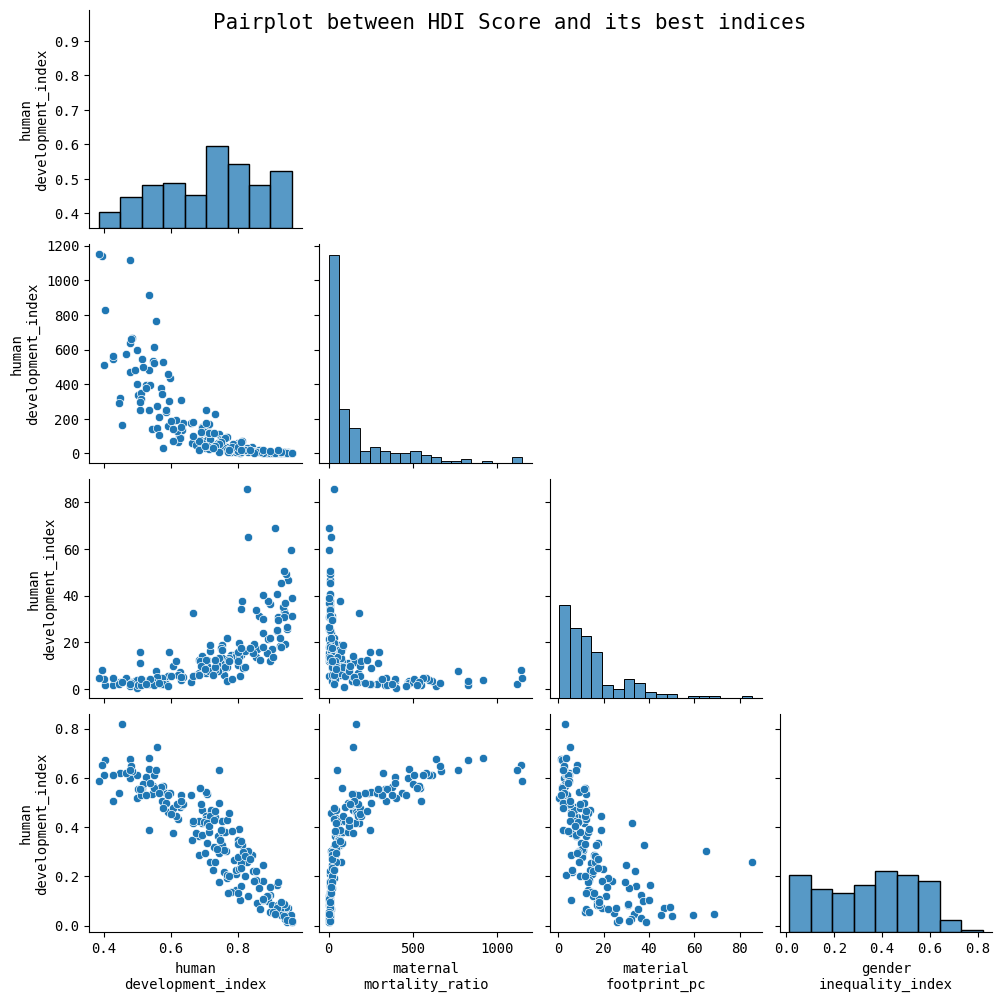

In [ ]:
# Create the pairplot
pp = sns.pairplot(sub, corner=False)
pp.map_upper(hide_current_axis)
# Set custom y-axis label positions for the pairplot
for i, ax in enumerate(pp.axes.flat):
    ax.set_xlabel(labels[i % len(labels)],rotation=0)
    ax.set_ylabel(labels[i % len(labels)])  # Set y-axis label


pp.fig.suptitle("Pairplot between HDI Score and its best indices", fontsize=15)

plt.show()